In [15]:
import pandas as pd
import numpy as np

### 분기 데이터로 줄였을 때 월별 데이터와 비슷한지 비교하기

#### 데이터 불러오기 및 분기 데이터로 변경하기

In [16]:
target=pd.read_csv('./Data/rice_target.csv')

In [17]:
target['분기'] = [1 if i in [1,2,3] else 2 if i in [4,5,6] else 3 if i in [7,8,9] else 4 for i in target['월']]
target

,날짜,년도,소비량,월,분기
0,1997-11-01,1997,277.8,11,4
1,1997-12-01,1997,275.3,12,4
2,1998-01-01,1998,278.0,1,1
3,1998-02-01,1998,266.7,2,1
4,1998-03-01,1998,273.1,3,1
...,...,...,...,...,...
270,2022-05-01,2022,154.1,5,2
271,2022-06-01,2022,154.8,6,2
272,2022-07-01,2022,150.7,7,3
273,2022-08-01,2022,151.8,8,3


In [18]:
target_div=pd.pivot_table(target,index=['년도','분기'],values=['소비량'],aggfunc=np.median)

In [19]:
target_div.to_csv('./Data/rice_target_div.csv')

In [25]:
target_div=target_div.reset_index()

In [26]:
target_div

,년도,분기,소비량
0,1997,4,276.55
1,1998,1,273.10
2,1998,2,272.40
3,1998,3,265.20
4,1998,4,267.20
...,...,...,...
95,2021,3,149.40
96,2021,4,156.40
97,2022,1,156.45
98,2022,2,154.80


### 분기별 데이터가 월별 데이터의 표본이 될 수 있는지 확인해보자

In [21]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

In [22]:
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [27]:
target_sub = pd.DataFrame(
    {
        'index':target.index,
        'consumption':target['소비량']
    }
)

target_sub_div = pd.DataFrame(
    {
        'index':target_div.index,
        'consumption':target_div['소비량']
    }
)

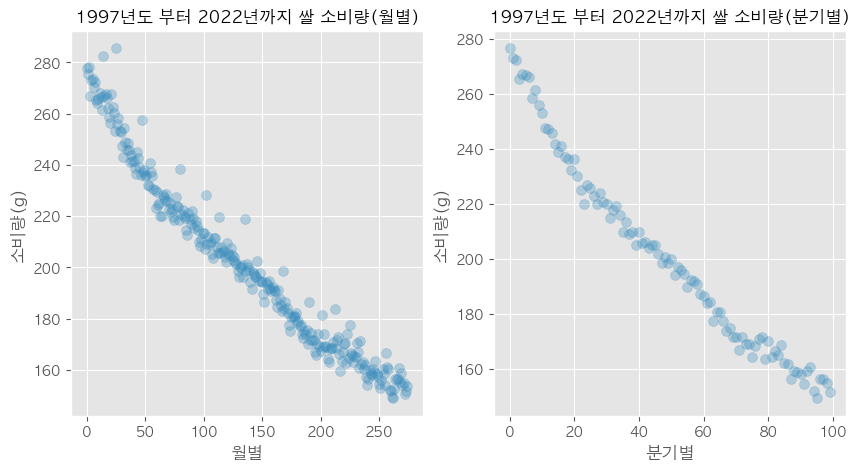

In [44]:
plt.style.use('ggplot')
fig , axs = plt.subplots(1 ,2,figsize=(30,10))

target_sub.plot(
    kind='scatter',
    x='index',
    y='consumption',
    s = 50,
    alpha = 0.3,
    figsize=(10,5),
    marker = 'o',
    ax=axs[0]
)

target_sub_div.plot(
    kind='scatter',
    x='index',
    y='consumption',
    s = 50,
    alpha = 0.3,
    figsize=(10,5),
    marker = 'o',
    ax=axs[1]
)

axs[0].set_title('1997년도 부터 2022년까지 쌀 소비량(월별)',size=12)
axs[0].set_ylabel('소비량(g)')
axs[0].set_xlabel('월별')

axs[1].set_title('1997년도 부터 2022년까지 쌀 소비량(분기별)',size=12)
axs[1].set_ylabel('소비량(g)')
axs[1].set_xlabel('분기별')

plt.savefig('./Plot/쌀소비량산점도_row줄였을때.jpg')

plt.show()